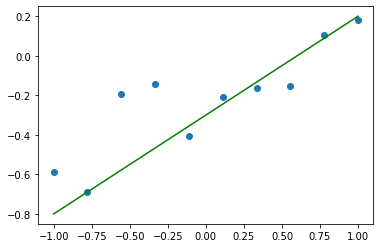

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm, multivariate_normal
from math import sqrt

x=np.linspace(-1,1,10)
def dataset():
    y=0.5*x-0.3
    p=y+np.random.normal(0,0.2,10)
    return p


sample_pts=dataset()
plt.scatter(x, sample_pts)
plt.plot(x, 0.5 * x-0.3, 'g')

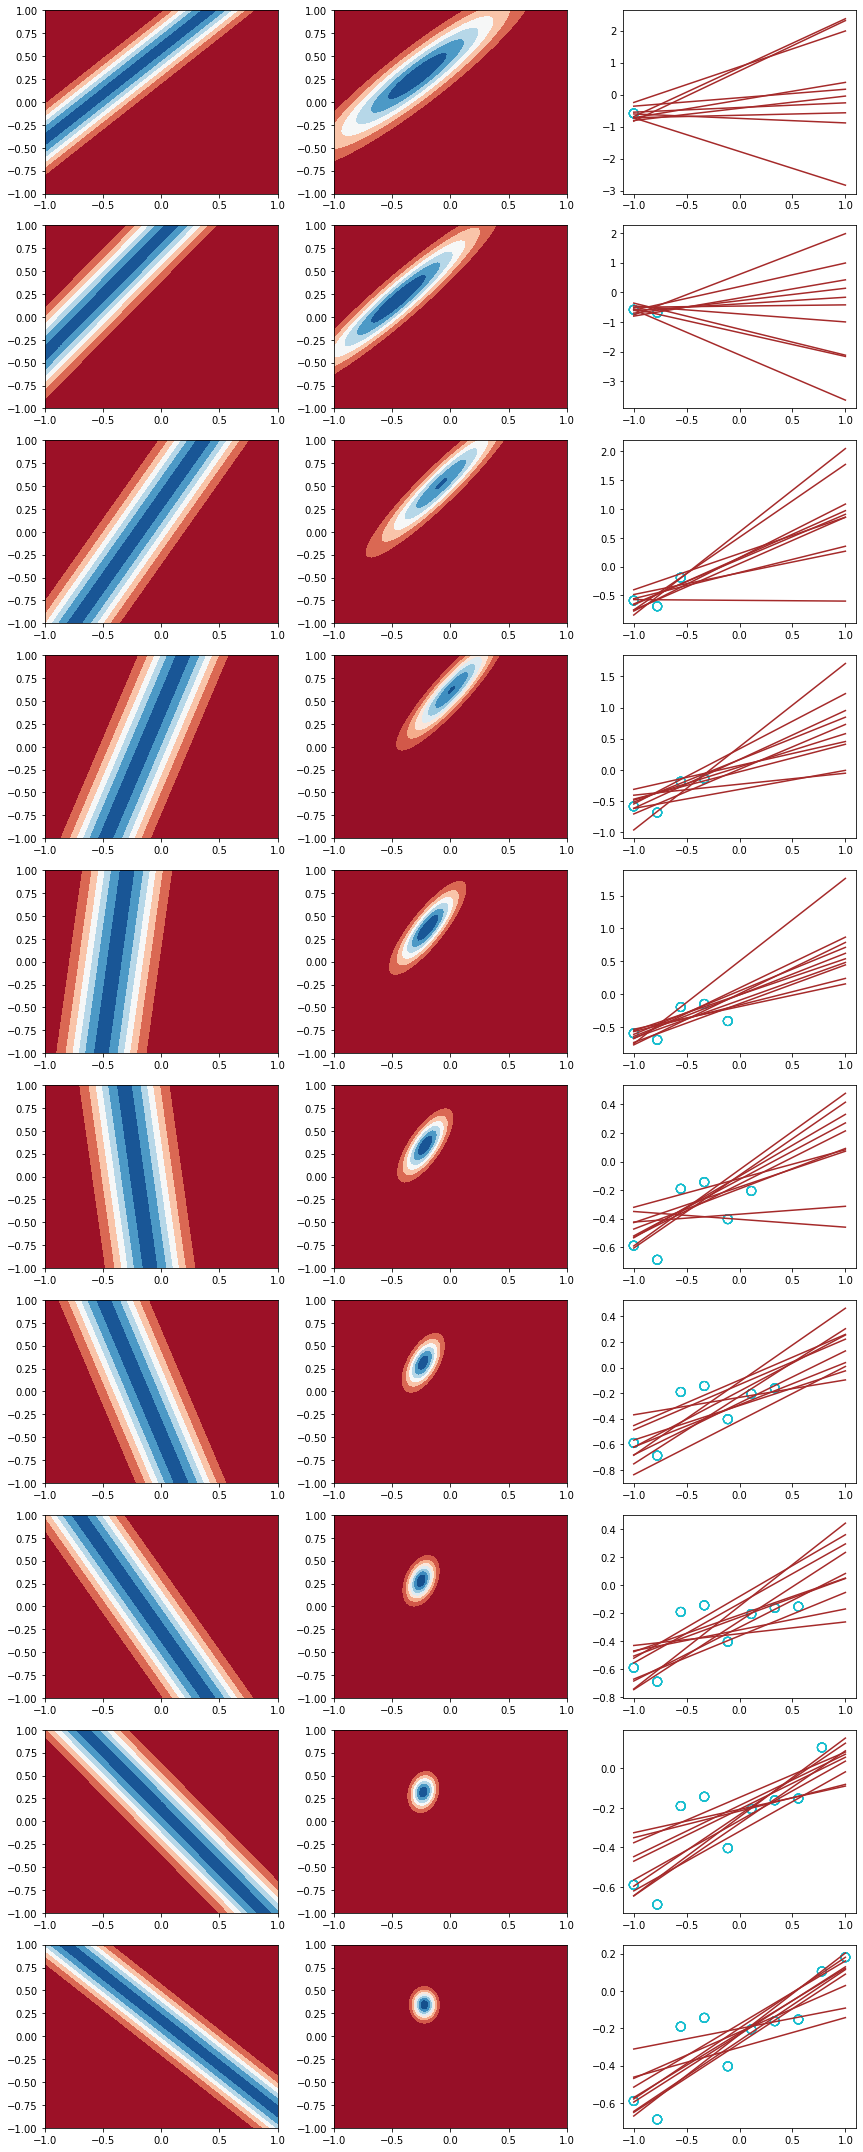

In [7]:
def line(x, w0=-0.3, w1=0.5):
    return w0 + w1*x

def gaussian(x, y, w0, w1):
    const = sqrt(np.pi * 2) * 0.2
    return const * np.exp(-0.5 * ((y - line(x, w0, w1))/0.2) ** 2)

def post(s0, m0, phi, beta, t):
    s0_inv = np.linalg.inv(s0)
    Sn = np.linalg.inv(s0_inv + beta * phi.T@phi)
    M = s0_inv@(m0.reshape((2, 1))) + beta * phi.T * t
    Mn = Sn @ M 
    return Mn.reshape((1, 2))[0], Sn

w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
p0 = norm.pdf(w0, 0, sqrt(0.5))
p1 = norm.pdf(w1, 0, sqrt(0.5))
prior = p0 * p1
m0, s0 = np.array([0, 0]), np.array([[1, 0], [0, 1]])
beta = 25
fig, axes = plt.subplots(10, 3, figsize=(12, 30))
count = 0
new_x, new_y = [], []
for i, j in zip(x, sample_pts):
    likelihood = gaussian(i, j, w0, w1)
    posterior = prior * likelihood
    prior = posterior
    phi = np.array([1,i]).reshape((1,2))
    m0, s0 = post(s0, m0, phi, beta, j)
    d = multivariate_normal.rvs(m0, s0, 10)
    new_x.append(i)
    new_y.append(j)
    axes[count, 0].contourf(w0, w1, likelihood, cmap="RdBu")
    axes[count, 1].contourf(w0, w1, posterior, cmap="RdBu")
    for l in d:
      axes[count, 2].plot(x, l[0] + l[1] * x, c="brown")
      axes[count, 2].scatter(new_x, new_y, s=80, facecolors='none', edgecolors='#17becf')
    count += 1
fig.tight_layout()